In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('C:\\Users\GENEXT\\Downloads\\classes\\Data science with python\\Comcast_telecom_complaints_data.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [8]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [27]:
df['Date_month_year']=df['Date_month_year'].apply(pd.to_datetime)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [66]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels.
df.Date.value_counts()

24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
           ... 
05-10-15      7
17-05-15      7
04-05-15      6
04-11-15      5
05-03-15      5
Name: Date, Length: 91, dtype: int64

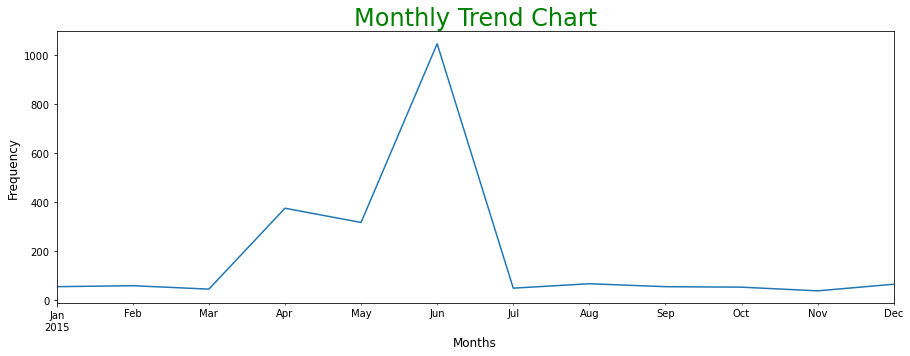

In [71]:
plt.figure(figsize=(15,5))
month=df['Date'].groupby(pd.Grouper(freq='M')).size().plot()
plt.xlabel("Months",fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Monthly Trend Chart',fontsize=24,color='green',)
plt.show()

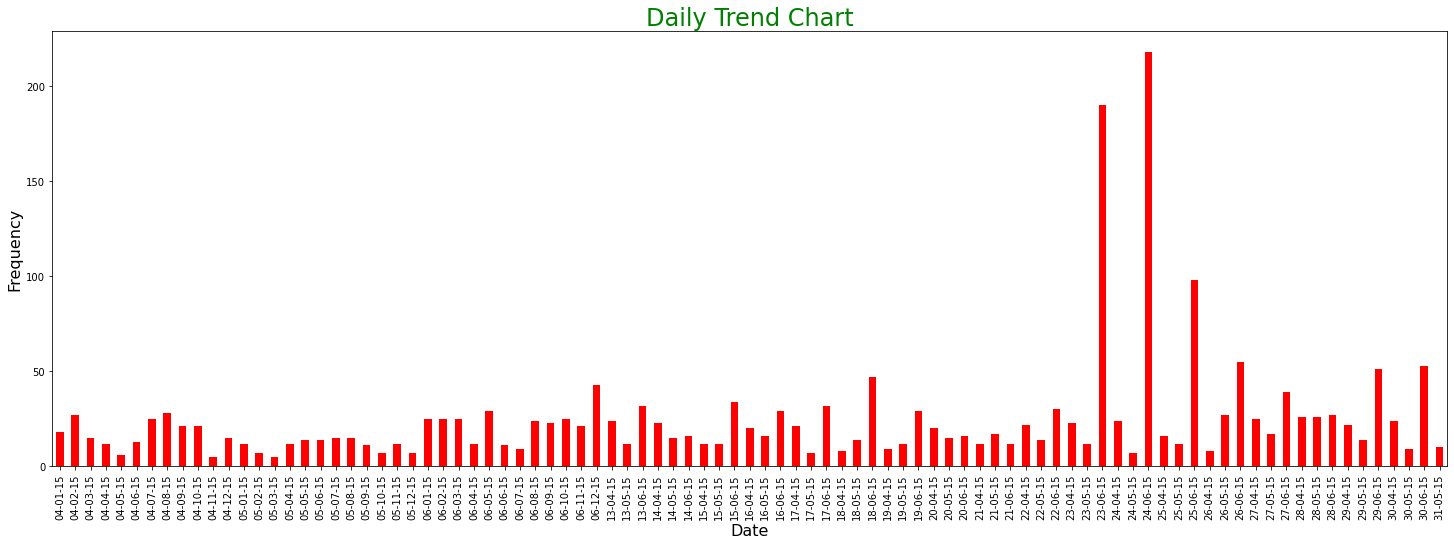

In [85]:
plt.figure(figsize=(25,8))
day=df['Date'].groupby(df.Date).count().plot(kind='bar',color='red')
plt.xlabel("Date",fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Daily Trend Chart',fontsize=24,color='green',)
plt.show()

In [196]:
#Provide a table with the frequency of complaint types.
df['Customer Complaint'].value_counts()[0:10]


Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Data Caps           11
Comcast Billing             11
Unfair Billing Practices     9
Data Cap                     8
Internet speed               8
Name: Customer Complaint, dtype: int64

In [156]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
internet_issue1=df[df['Customer Complaint'].str.contains('internet',case=False)].count()
internet_issue2=df[df['Customer Complaint'].str.contains('data',case=False)].count()
internet_issue3=df[df['Customer Complaint'].str.contains('speed',case=False)].count()
internet_issue=internet_issue1+internet_issue2+internet_issue3
internet_issue

Ticket #                       943
Customer Complaint             943
Date                           943
Time                           943
Received Via                   943
City                           943
State                          943
Zip code                       943
Status                         943
Filing on Behalf of Someone    943
dtype: int64

In [153]:
billing_issue1=df[df['Customer Complaint'].str.contains('billing',case=False)].count()
billing_issue2=df[df['Customer Complaint'].str.contains('bill',case=False)].count()
billing_issue3=df[df['Customer Complaint'].str.contains('charges',case=False)].count()
billing_issue=billing_issue1+billing_issue2+billing_issue3
billing_issue

Ticket #                       754
Customer Complaint             754
Date                           754
Time                           754
Received Via                   754
City                           754
State                          754
Zip code                       754
Status                         754
Filing on Behalf of Someone    754
dtype: int64

In [148]:
email_issue=df[df['Customer Complaint'].str.contains('email',case=False)].count()
email_issue

Ticket #                       16
Customer Complaint             16
Date                           16
Time                           16
Received Via                   16
City                           16
State                          16
Zip code                       16
Status                         16
Filing on Behalf of Someone    16
dtype: int64

Ticket #                       511
Customer Complaint             511
Date                           511
Time                           511
Received Via                   511
City                           511
State                          511
Zip code                       511
Status                         511
Filing on Behalf of Someone    511
dtype: int64

In [5]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
df['open/closed']=df['Status'].apply(lambda x: 'Closed' if (x =='Solved'or x== 'Closed') else 'Open')
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,open/closed
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


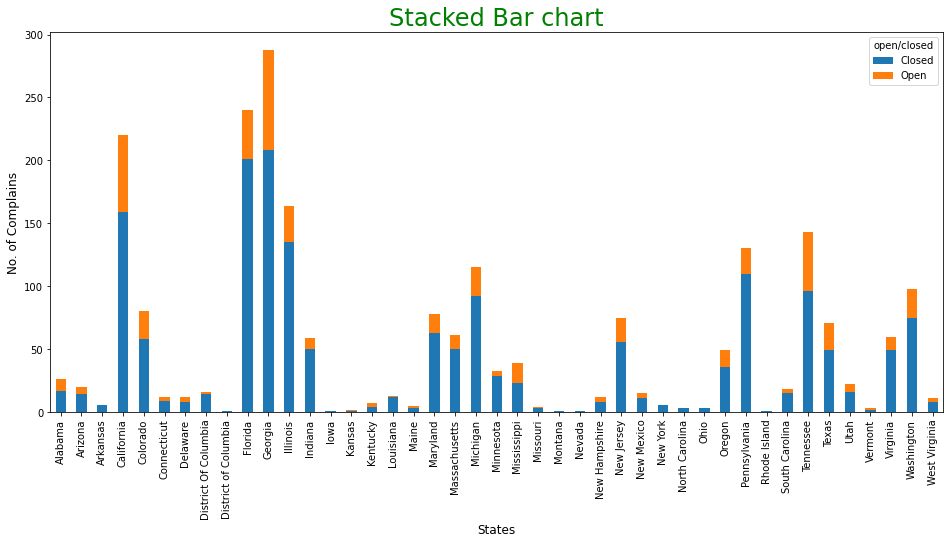

In [236]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

df.groupby(['State','open/closed']).size().unstack().plot(kind='bar',stacked=True,figsize=(16,7))
plt.xlabel("States",fontsize=12)
plt.ylabel('No. of Complains',fontsize=12)
plt.title('Stacked Bar chart',fontsize=24,color='green',)
plt.show()

In [235]:
df.groupby(['State']).size().sort_values(ascending=False)[:1]

State
Georgia    288
dtype: int64

In [258]:
Open_per=df.groupby(['State','open/closed']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
Open_per[:5]

open/closed,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0


In [256]:
Open_per['percentage']=Open_per['Open']/Open_per['Open'].sum()*100
Open_per[:5]

open/closed,Closed,Open,percentage
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284


In [7]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
resolved_data=df.groupby(['Received Via','open/closed']).size().unstack().fillna(0)


In [8]:
resolved_data['solved']=resolved_data['Closed']/resolved_data['Closed'].sum()*100
resolved_data

open/closed,Closed,Open,solved
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886


<AxesSubplot:xlabel='Received Via'>

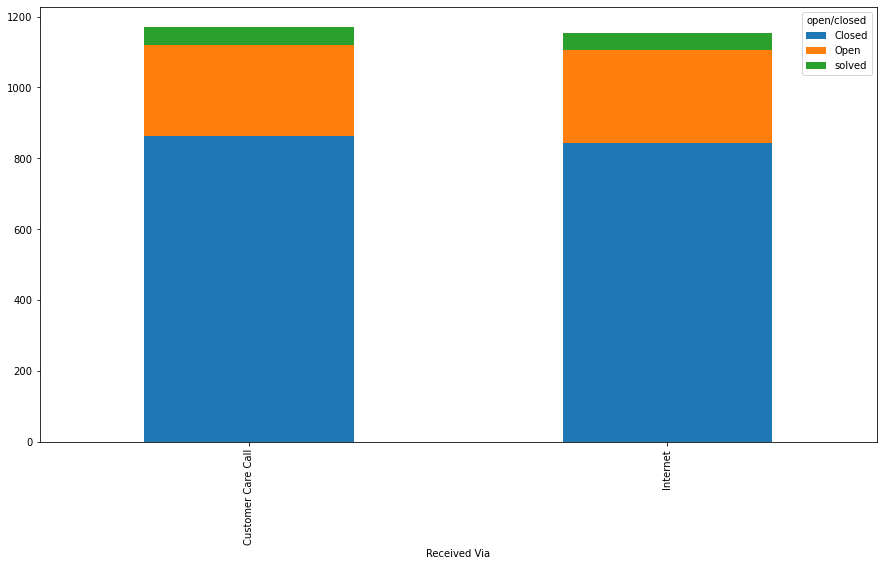

In [277]:
resolved_data.plot(kind='bar',stacked=True,figsize=(15,8))